In [30]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
%matplotlib inline
import numpy as np
from numpy import array as arr

In [18]:
def laser(a, x, y1, y2, laserargs, alpha=0.2):
    a.plot(x, y1, **laserargs)
    a.plot(x, y2, **laserargs)
    a.fill_between(x,y1,y2, color=laserargs['color'], alpha=alpha)

In [19]:
def lens(a, x,y,w,r, lensargs):
    xpts = np.linspace(-r, -r+w/2, 1000);
    ypts = spherical_y(xpts, r)
    xpts2 = np.linspace(r-w/2, r, 1000);
    ypts2 = spherical_y(xpts2, r)
    x_ = arr(list(xpts+r) + list(xpts2-r+w))
    y_ = arr(list(ypts) + list(ypts2))
    
    a.plot(x+x_,y+y_,
             x+x_,y-y_,
             **lensargs)
    a.fill_between(x+x_,y+y_,y-y_, color=lensargs['color'], alpha=0.2)


In [20]:
def spherical_y(x,r):
    # x^2+y^2=r^2
    #y=sqrt(r^2-x^2)
    return np.sqrt(r**2-x**2)

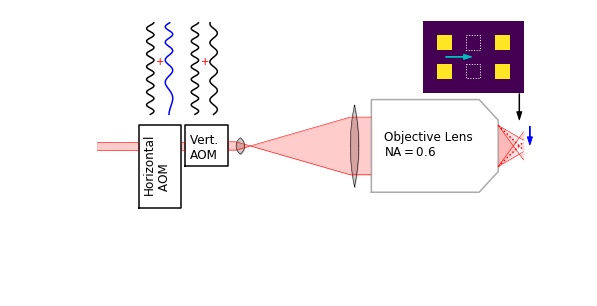

In [146]:
f, a = plt.subplots(figsize=(10,5))
a.axis("off")
laserargs = {"color":'r', 'linewidth':0.5}
lensargs = {"color":'k', 'linewidth':0.5}
#lasercolor='r'
#boundary
x1, x2 = -2, 10
y1, y2 = -3, 3
a.plot([x1,x2,x2,x1,x1],[y1,y1,y2,y2,y1], color='w');

# Horizontal AOM
px_h_aom, py = 0,-1.5
h = 2
w_h_aom = 1
a.plot([px_h_aom,px_h_aom+w_h_aom,px_h_aom+w_h_aom,px_h_aom,px_h_aom], [py,py,py+h,py+h,py], color='k');
plt.text(px_h_aom+w_h_aom/10, py+0.6*h, 'Horizontal\n AOM', fontsize=12, rotation=90)
# laser before aoms
px_p, py = -1, 0
lt=0.1
laser(a,[px_p, px_h_aom], [py+lt,py+lt], [py-lt,py-lt], laserargs)

# Vertical AOM
px_v_aom, py = 1.1,-0.5
w_v_aom = 1
a.plot([px_v_aom,px_v_aom+w_v_aom,px_v_aom+w_v_aom,px_v_aom,px_v_aom], [py,py,py+1,py+1,py], color='k');
plt.text(px_v_aom+w_v_aom/10, py+0.2, 'Vert.\nAOM', fontsize=12)
# laser between AOMs
i1, i2 = px_h_aom+w_h_aom, px_v_aom
laser(a,[i1,i2], [lt,lt],[-lt,-lt], laserargs)

# telescope glc
x_glc = 2.3
lens(a,x_glc,0,0.2,0.25, lensargs)
# telescope big
x_bl = 5
lens(a,x_bl,0,0.2,5, lensargs)


# High-NA lens
size = 0.75
w, h = arr((4,3))*size
px, py = (5.5,-h/2)
fx, fy = arr((0.85, 0.5))
a.plot([px, px+fx*w, px+w, px+w,px+fx*w,px,px], [py,py,py+fy,py+h-fy,py+h,py+h,py], color='#AAAAAA')
plt.text(px+w/10, py+0.4*h, 'Objective Lens\nNA$=0.6$', fontsize=12)
# laser through telescope
y_l = 0.7
laser(a,[px_v_aom+w_v_aom, x_glc, x_bl, px ], [lt,lt,-y_l,-y_l], [-lt,-lt,y_l,y_l], laserargs)
# lasers after sill (loop for each pt)
y_l = 0.5
nt = 2
y_e = 0.2
for n in range(nt):
    yf = -y_e+y_e*2*n/(nt-1)
    laser(a,[px+w, px+w+y_l, px+w+1.2*y_l], [y_l, yf, yf - 0.2*(-yf+y_l)], [-y_l, yf, yf + 0.2*(yf+y_l)], laserargs, alpha=0.1)    
    
laser(a,[px+w, px+w+y_l, px+w+1.2*y_l], [y_l, 0, -0.2*y_l], [-y_l, 0, 0.2*y_l], {'color':'r','linestyle':':'}, alpha=0.1)    

x_atom = px+w+y_l
a.annotate("", xy=(x_atom+0.25, 0), xytext=(x_atom+0.25,0.5), 
             arrowprops=dict(linestyle='-',width=0.5, headwidth=5,headlength=8,color='b',shrink=0.05))

# stuff for pointing to atoms
y_dl = 0.5

a.annotate("", xy=(x_atom, 0.6), xytext=(x_atom,1.3),
           arrowprops=dict(linestyle='-',width=0.5, headwidth=5,headlength=8,color='k',shrink=0.05))
# atom inset

aim = inset_axes(a, width=2, height=1,
                 bbox_to_anchor=(0, 0, 0.925, 0.96),
                 bbox_transform=a.transAxes,
                 borderpad=0)
# alternative: use actual atom image: 
# img=mpimg.imread('10x10_Atom_Image.png')
img = np.zeros((5,7))
img[1,1] = 1
img[3,1] = 1
img[1,5] = 1
img[3,5] = 1
aim.imshow(img)
aim.add_patch(plt.Rectangle((2.5,0.5), 1,1,linestyle=':', edgecolor='w', facecolor='none'))
aim.add_patch(plt.Rectangle((2.5,2.5), 1,1,linestyle=':', edgecolor='w', facecolor='none'))
aim.annotate("", xy=(3, 2), xytext=(1,2), 
             arrowprops=dict(linestyle='-',width=0.5, headwidth=5,headlength=8,color='c',shrink=0.05))
aim.axis('Off')
# sine wave for horizontal aom
s = 2.5
a_sh = inset_axes(a, width=0.4, height=1.4,
                 bbox_to_anchor=(0, 0, 0.26, 0.97),
                 bbox_transform=a.transAxes,
                 borderpad=0)
x_sin = np.linspace(0,2*np.pi*1.2,100)
a_sh.plot(-s+np.sin(6*x_sin), x_sin, color='k')
a_sh.text(-1,1.3*np.pi,'+',color='r')
a_sh.plot(s+np.sin(x_sin**1.6), x_sin,color='b')
a_sh.axis('off')

# sine wave for v aom
a_sv = inset_axes(a, width=0.4, height=1.4,
                 bbox_to_anchor=(0, 0, 0.34, 0.97),
                 bbox_transform=a.transAxes,
                 borderpad=0)
a_sv.plot(-s+np.sin(6*x_sin), x_sin, color='k')
a_sv.text(-1,1.3*np.pi,'+',color='r')
a_sv.plot(s+np.sin(4*x_sin), x_sin,color='k')
a_sv.axis('off')

plt.savefig('Experiment_Diagram_Grey_Paper.png', transparent=True, dpi=400, bbox_inches='tight', pad_inches=0)